In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving amsterdam_combined_dummified.csv to amsterdam_combined_dummified (1).csv
User uploaded file "amsterdam_combined_dummified (1).csv" with length 145277 bytes


# Rigde & Lasso (with CV)

In [12]:
import pandas as pd

# Load the dataset
file_path = 'amsterdam_combined_dummified.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Total_Price,Is_Shared_Room,Is_Private_Room,Max_Person_Capacity,Is_Super_Host,Is_Multi_Room,Is_Business_Listing,Cleanliness_Rating,Guest_Satisfaction_Rating,Number_of_Bedrooms,Distance_from_City_Center,Distance_from_Metro,Day_Type_Weekend
0,194.033698,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0
1,344.245776,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0
2,264.101422,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0
3,433.529398,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0
4,485.552926,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and the target
X = data.drop('Total_Price', axis=1)
y = data['Total_Price']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1664, 12), (416, 12), (1664,), (416,))

In [14]:
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define the alphas to test for Ridge and Lasso
ridge_alphas = 10**np.linspace(-4, 4, 100)
lasso_alphas = 10**np.linspace(-4, 4, 100)

# Perform Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# Perform Lasso regression with cross-validation
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5, max_iter=100000)
lasso_cv.fit(X_train, y_train)

# Predictions from Ridge and Lasso
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Evaluate the performance
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

(ridge_cv.alpha_, ridge_rmse, ridge_r2), (lasso_cv.alpha_, lasso_rmse, lasso_r2)


((166.81005372000593, 428.13795934321934, 0.3369369132232066),
 (4.037017258596558, 427.49171719563014, 0.33893709054946153))

## R2 Change

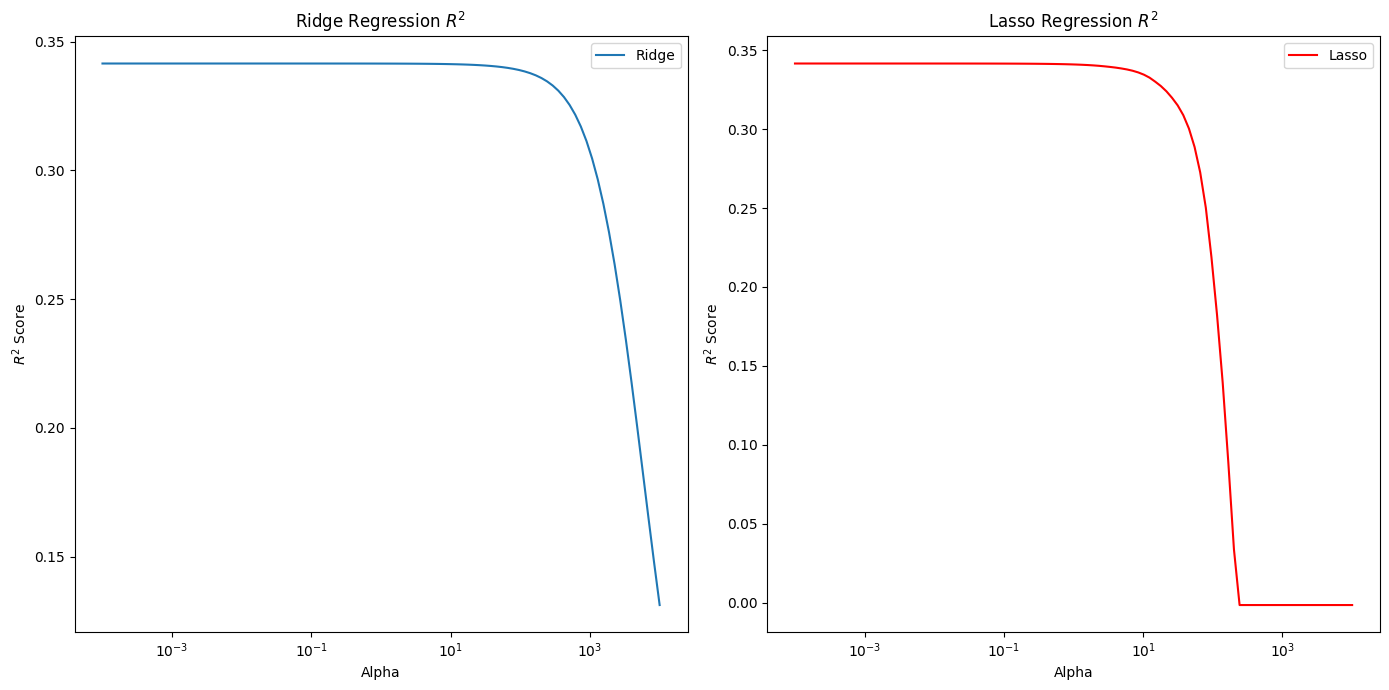

In [15]:
from sklearn.linear_model import Ridge, Lasso

# Initialize arrays to store the scores for each alpha
ridge_scores = []
lasso_scores = []

# Loop over the alphas and calculate R^2 score for each
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_scores.append(ridge_model.score(X_test, y_test))

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=100000)
    lasso_model.fit(X_train, y_train)
    lasso_scores.append(lasso_model.score(X_test, y_test))

# Convert lists to numpy arrays for plotting
ridge_scores = np.array(ridge_scores)
lasso_scores = np.array(lasso_scores)

# Now let's plot the results
import matplotlib.pyplot as plt

# Plotting Ridge results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.semilogx(ridge_alphas, ridge_scores, label='Ridge')
plt.title('Ridge Regression $R^2$')
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.legend()

# Plotting Lasso results
plt.subplot(1, 2, 2)
plt.semilogx(lasso_alphas, lasso_scores, label='Lasso', color='red')
plt.title('Lasso Regression $R^2$')
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.legend()

plt.tight_layout()
plt.show()


## Coefficients Change

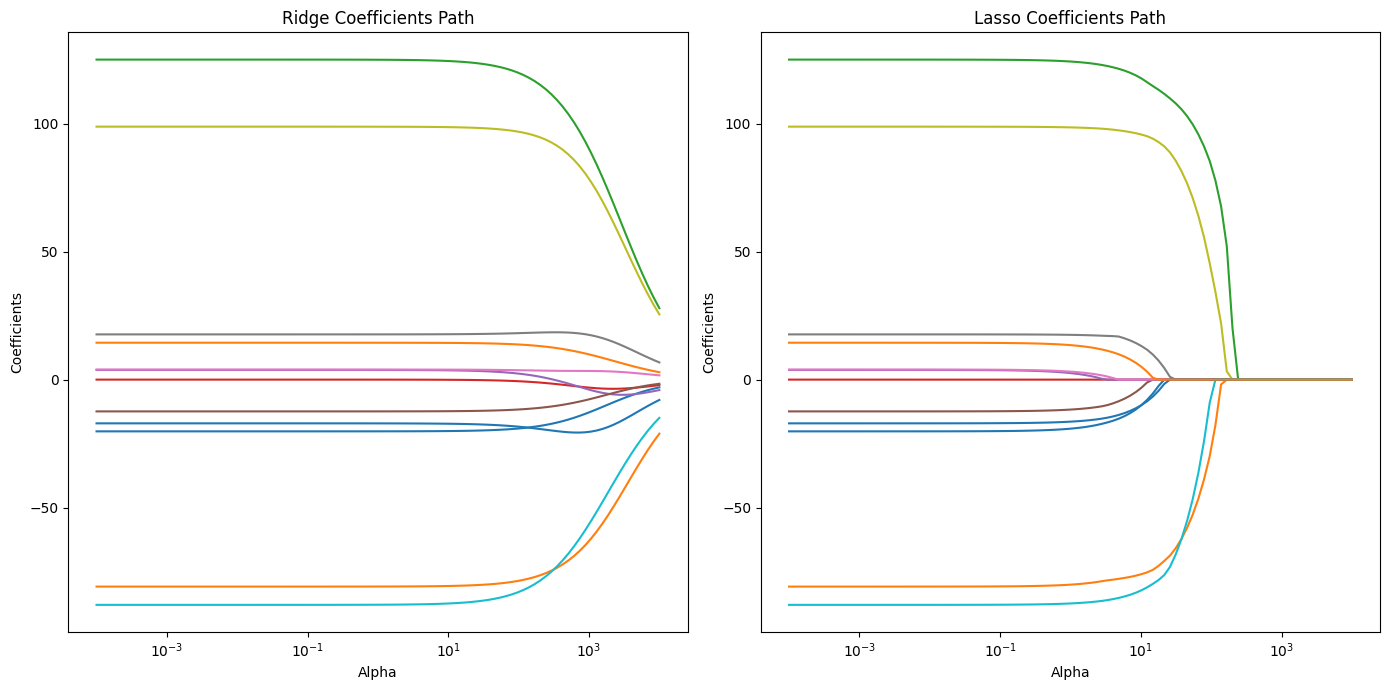

(array([-2.02017254e+01, -8.08329544e+01,  1.25000731e+02,  8.83974233e-03,
         3.79090347e+00, -1.24038096e+01,  3.94426084e+00,  1.76733857e+01,
         9.88096961e+01, -8.79670410e+01, -1.70716500e+01,  1.44193826e+01]),
 array([-2.02016210e+01, -8.08328671e+01,  1.25000663e+02,  8.75717963e-03,
         3.79078497e+00, -1.24037475e+01,  3.94419421e+00,  1.76733806e+01,
         9.88096681e+01, -8.79669895e+01, -1.70715825e+01,  1.44192883e+01]))

In [16]:
# Initialize dictionaries to store the coefficients for each alpha
ridge_coefficients = {}
lasso_coefficients = {}

# Loop over the alphas and store coefficients for each
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_coefficients[alpha] = ridge_model.coef_

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=100000)
    lasso_model.fit(X_train, y_train)
    lasso_coefficients[alpha] = lasso_model.coef_

# Find the index of the best alpha for Ridge and Lasso
best_ridge_index = np.argmax(ridge_scores)
best_lasso_index = np.argmax(lasso_scores)

# Get the best coefficients for Ridge and Lasso
best_ridge_coefficients = ridge_coefficients[ridge_alphas[best_ridge_index]]
best_lasso_coefficients = lasso_coefficients[lasso_alphas[best_lasso_index]]

# Plotting the coefficient paths
plt.figure(figsize=(14, 7))

# Ridge coefficients
plt.subplot(1, 2, 1)
for i in range(X.shape[1]):
    plt.plot(ridge_alphas, [coef[i] for coef in ridge_coefficients.values()])
plt.title('Ridge Coefficients Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale('log')

# Lasso coefficients
plt.subplot(1, 2, 2)
for i in range(X.shape[1]):
    plt.plot(lasso_alphas, [coef[i] for coef in lasso_coefficients.values()])
plt.title('Lasso Coefficients Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale('log')

plt.tight_layout()
plt.show()

best_ridge_coefficients, best_lasso_coefficients


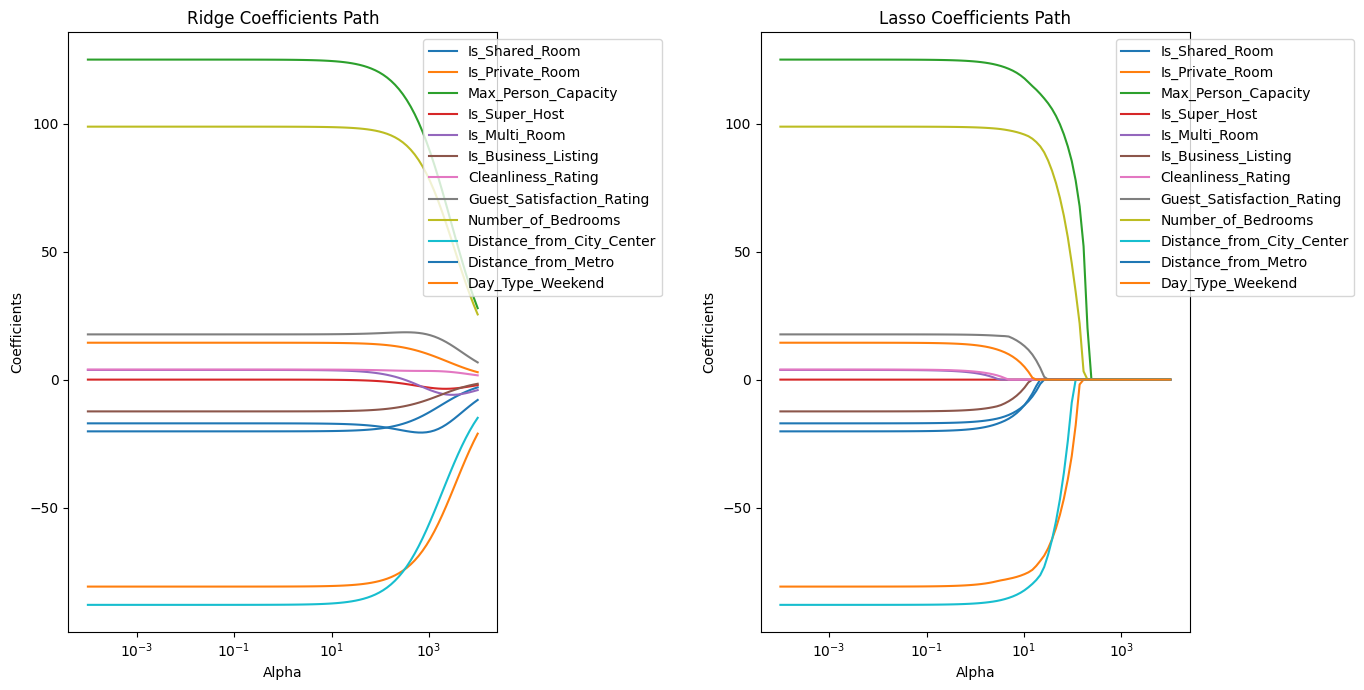

In [ ]:
# Define the feature names from the dataset
feature_names = X.columns

# Plotting the coefficient paths with labels
plt.figure(figsize=(14, 7))

# Ridge coefficients
plt.subplot(1, 2, 1)
for i in range(X.shape[1]):
    plt.plot(ridge_alphas, [coef[i] for coef in ridge_coefficients.values()], label=feature_names[i])
plt.title('Ridge Coefficients Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Lasso coefficients
plt.subplot(1, 2, 2)
for i in range(X.shape[1]):
    plt.plot(lasso_alphas, [coef[i] for coef in lasso_coefficients.values()], label=feature_names[i])
plt.title('Lasso Coefficients Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

plt.tight_layout()
plt.show()
